# FIT5201: Assessment 1
## The Elements of Machine Learning

### Objectives
This assignment consists of three parts (A,B,C) that assess your understanding of model complexity, model selection, uncertainty in prediction with bootstrapping, and probabilistic machine learning. The total marks of this assessment is 100, and will contribute to the 20% of your final score. 

## Important Note
* You can complete your assignment using the codes shared in the unit as a base. However, <font color='red'>**you should make sure the codes you are borrowing are correct and relevant to the question**</font>.

* Please follow the structure of this template as much as you can.

* You can use the prepopulated codes cells or change them if you prefere. However, please do not change the name of the key variables, functions, and parameters eg `knn`, `num.fold`, `train.data`. It helps us to read and understand your submissiont more efficiently.

### Part A.  Model Complexity and Model Selection
In this part, you study the effect of model complexity on the training and testing errors.  You also demonstrate your programming skills by developing a regression algorithm and a cross-validation technique that will be used to select the models with the most effective complexity.

__Background__. A KNN regressor is similar to a KNN classifier (covered in Activity 1.1) in the sence that it finds the K nearest neighbors and estimates the label of the given test point based on the labels of its nearest neighbours. The main difference between KNN regression and KNN classification is that KNN classifier returns the label that has the majority vote in the neighborhood, whilst KNN regressor returns the average of the neighbors’ labels. 

#### Question 1 [KNN Regressor] 
Q1-1) Implement the KNN regressor function:
                                     `knn(train.data, train.label, test.data, K=3)` 
which takes the training data and their labels (continuous values), the test set, and the size of the neighborhood (`K`). It should return the regressed values for the test data points. When choosing the neighbors, you can use the Euclidean distance function to measure the distance between a pair of data points. 

__Hint__: You are allowed to use KNN classifier code from Activity 1 of Module 1.

Q1-2) Plot the training and the testing errors versus `1/K` for `K=1,..,20` in one plot, using the Task1A_train.csv and Task1A_test.csv datasets provided for this assignment. Discuss your findings.

Q1-3) Report the best value for K in terms of the testing error. Discuss the values of K corresponding to underfitting and overfitting based on your plot in Q1-2. 

#### Question 2 [K-fold Cross Validation] 
Q2-1) Implement a K-fold Cross Validation (CV) function for your KNN regressor:  
       `cv(train.data, train.label, numFold=10)` 
which takes the training data and their labels (continuous values), the number of folds, and returns RMSE for different folds of the training data. 

__Hint__: you are allowed to use bootstrap code from Activity 2 of Module 1.

Q2-2) Using the training data, run your K-fold CV where the `numFold` is set to 10. Change the value of `K=1,..,20` and for each K compute the average `10` RMSE values you have got.  Plot the average error numbers versus `1/K` for `K=1,..,20`. Further, add two dashed lines around the average error indicating the average +/- standard deviation of errors. Include the plot in your report. 

Q2-3) Report the values of K that results the minimum average RMSE and minimum standard deviation of RMSE based on your cross validation plot in Q2-2.  Discuss your findings.

## Question 1 [KNN Regressor] 

We load the R libraries required.

In [270]:
# Import the required libraries for this assignment
library(ggplot2) # For plotting
library(reshape2) # For ...
library(dplyr) # For dataframe manipulation


### Q1-1 Implement the KNN regressor

We define a function to calculate the mean value of the K nearest neighbours based on a distance matrix. And a function to calculate the root mean square error (RMSE).

In [271]:
# http://members.cbio.mines-paristech.fr/~jvert/svn/tutorials/practical/knnregression/knnregression.R

# KNN function - Distance is set as 'euclidean'
knn <- function(train.data, test.data, K ){
    ## count number of train samples
    train.len <- nrow(train.data)
    
    ## count number of test samples
    test.len <- nrow(test.data)
    
    # create am empty output dataframe
    knn.reg <- test.data[0, ]
    
    ## calculate distances between samples
    dist <- as.matrix(dist(rbind(test.data, train.data), 'euclidean'))[1:test.len, (test.len+1):(test.len+train.len)]
    
    ## for each test sample
    for (i in 1:test.len){
    
        ### ...find its K nearest neighbours from training samples and store its indices
        
        nn.indices <- as.data.frame(sort(dist[i,], index.return = TRUE))[1:K,2]
        
        ###... and calculate the average distance from nearest neighbors        
        if (dim(test.data)[2] > 1)
        {
            ## get averages of each column separately if there are more test.data has more than
            ## one variable
            knn.reg[i,] <- t(colSums(train.data[nn.indices,])/K)   
        }
        else
        {
            ## get standard average if the test set has only one variable in test.data
            knn.reg[i] <- (sum(train.data[nn.indices,])/K)
        }
    }
    
    ## output knn.reg dataframe which stores average distance value of neighbors
    return (knn.reg)
}



In [272]:
## https://gisgeography.com/root-mean-square-error-rmse-gis/

# Root Mean Square Value is calculated based on the below formula.
rmse <- function(estimated.value,real.value) {
  return (sqrt(sum((estimated.value - real.value)^2)/nrow(real.value)))
}

### Q1-2 Plot training and testing errors v.s. 1/K

We load the data, then separate the predictors (train.data and test.data) from the target values (train.value and test.value) for input to the knn regressor function.

In [273]:
# Load the data
train.data <- read.csv("../Task1A_train.csv")
test.data <- read.csv("../Task1A_test.csv")

# set random seed
set.seed(1234)


In [274]:
# Split dependent and independent attributes
train.label <- train.data[2]
train.data <- train.data[1]

test.label <- test.data[2]
test.data <- test.data[1]

train.len <- nrow(train.data)
test.len <- nrow(test.data)




We calculate the train and test RMSE's for K in 1:20.

In [275]:
# Initiate a dataframe to record RMSE
error <- data.frame('K'=1:20, 'TrainRMSE'=0, 'TestRMSE'=0)


# calculating rmse... 
for (k in 1:20) {
    
    # training rmse
    error[k, 'TrainRMSE'] = rmse(knn(train.data,train.data,k), train.data)
    
    
    # testing rmse
    error[k, 'TestRMSE'] = rmse(knn(train.data,test.data,k), test.data)
        
}

In [276]:
head(error)

K,TrainRMSE,TestRMSE
1,0.0000000,0.25000000
2,0.2500000,0.07715167
3,0.1091089,0.27277236
4,0.2937848,0.18898224
5,0.2439750,0.34931907
6,0.3971626,0.33629635


We plot the training and testing errors.

In [277]:
# Reshape Error Data
error.r <- melt(error, id='K') # reshape for visualization
names(error.r) <- c('K', 'type', 'error')

In [278]:
head(error.r)

K,type,error
1,TrainRMSE,0.0000000
2,TrainRMSE,0.2500000
3,TrainRMSE,0.1091089
4,TrainRMSE,0.2937848
5,TrainRMSE,0.2439750
6,TrainRMSE,0.3971626


In [279]:
tail(error.r)

,K,type,error
35,15,TestRMSE,1.314978
36,16,TestRMSE,1.430950
37,17,TestRMSE,1.578313
38,18,TestRMSE,1.706082
39,19,TestRMSE,1.858859
40,20,TestRMSE,1.997022


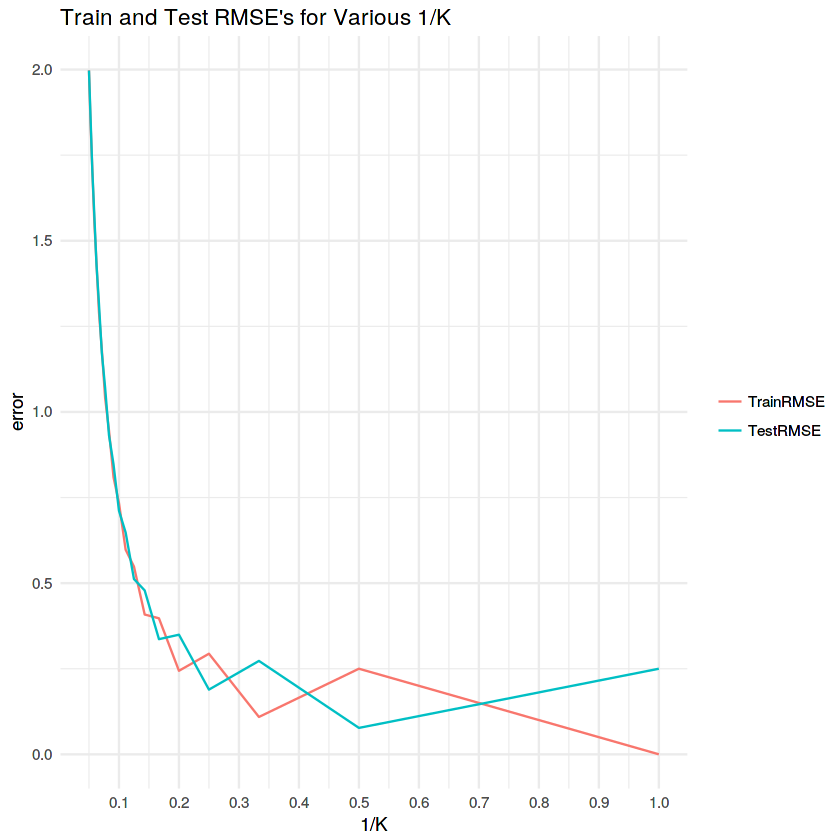

In [280]:
# Plot
ggplot(data=error.r, aes(x=1/K, y=error, color=type)) + geom_line() +
       scale_color_discrete(guide=guide_legend(title=NULL)) +
       theme_minimal() +
       scale_x_continuous(breaks=seq(0, 1, 0.1)) +
       ggtitle("Train and Test RMSE's for Various 1/K")

### Q1-3 Report the best K

We see that the best K is when 1/K is 0.5 i.e., when K is 2 when RMSE is run on the test data. While we also see that the model keeps on improving, i.e., the complexity of the regresser when K decreases.

## Question 2 [K-fold Cross Validation]

### Q2-1 Implement a K-fold cross validation

We define a function to segment a dataset into a given number of folds for K-fold cross validation to determine the most suitable value for the number of nearest neighbours K considering all the folds.

In [281]:
# Kfold Cross Validation function.
cv <- function (train.data,  num.fold, K){
    # Initiate a dataframe to record RMSE
    rmse.df <- data.frame(
                      K=numeric(),
                      L=numeric(),
                      RMSE = double(),
                      stringsAsFactors=FALSE
                      )
    
    dev.size = floor(nrow(train.data) / L) # number of samples reserved for validation
    # notice that since the sample size may not be a multiple of 10!
    
    for (l in 1:num.fold) {
        # start from 1 create bins of length dev.size
        # for example, l =1 indices = 1-4, l=2 indices = 5-8 and so on
        dev.indices.df = slice(train.data,(((l*dev.size)-dev.size)+1):(l*dev.size))
        
        # training data will include all indices except for ones identified for dev.indices.df
        train.indices.df = setdiff(train.data, dev.indices.df)
       
        # for each value of k, populate the dataframe reporting value of K, L and RMSE
        for (k in 1:K) {
            rmse.df <- rbind(rmse.df,data.frame(K=k,L=l,RMSE=rmse(knn(train.indices.df,dev.indices.df,k), dev.indices.df)))
        }
    }
    # Return the RMSE for all of K in a dataframe
    return(rmse.df)
}

In [282]:
K <- 20 # maximum number of nearest neighbours
L <- 10 # number of folds in cross validation

# Perform cross validation for above mentioned K & L values
kfold.out <-cv(train.data,L,K)

In [283]:
# head values of RMSE
head(kfold.out)

K,L,RMSE
1,1,1.369306
2,1,1.600781
3,1,1.837117
4,1,2.076656
5,1,2.318405
6,1,2.561738


In [284]:
# find the aggregate RMSE for a particular K for all L bins where RMSE is calculated
kfold.agg <- aggregate(RMSE ~ K, kfold.out, mean)

In [285]:
# view aggregated kfold by K
head(kfold.agg)

K,RMSE
1,0.8484431
2,0.9063187
3,0.8358982
4,0.8905812
5,0.6659330
6,0.7900002


### Q2-2 Plot RMSE v.s. 1/K

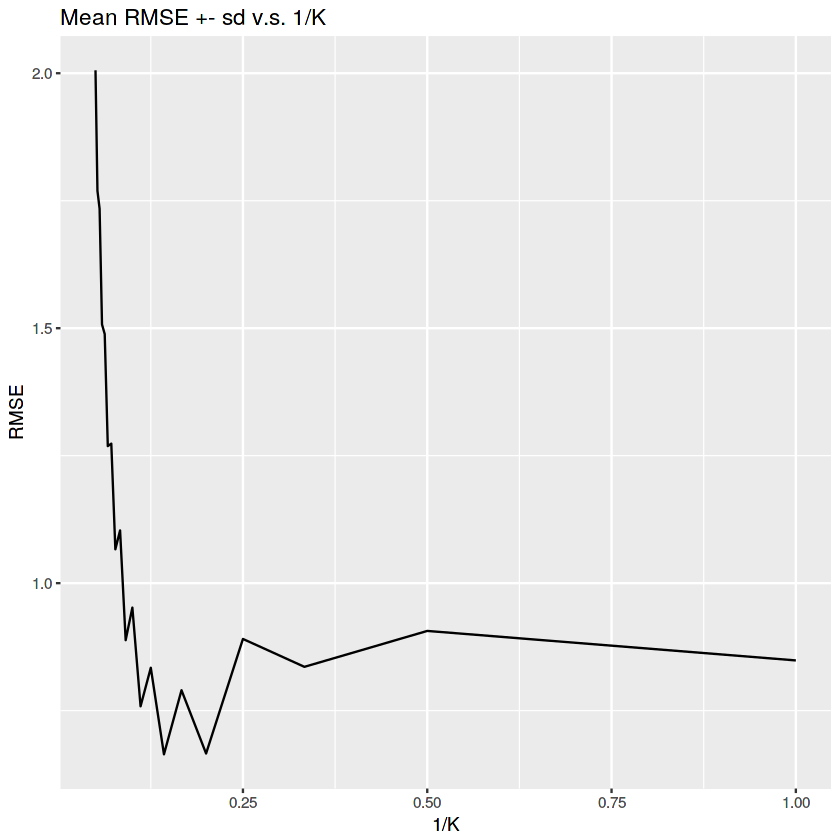

In [286]:
# Plot the RMSE vs 1/K
ggplot(data=kfold.agg, aes(x=1/K, y=RMSE)) + geom_line() +
       ggtitle("Mean RMSE +- sd v.s. 1/K")

### Q2-3 Report the best K

The trend of the above curve shows that the model performs optimally when the value of K = 7, closely followed by when the value of K is 5. The complexity reduces with the reduction of K until K = 7 and it deteriorates once K goes below 5.

### Part B. Prediction Uncertainty with Bootstrapping
This part is the adaptation of Activity 2 from KNN classification to KNN regression. You use the bootstrapping technique to quantify the uncertainty of predictions for the KNN regressor that you implemented in Part A. 

#### Question 3 [Bootstrapping]
Q3-1) Modify the code in Activity 2 to handle bootstrapping for KNN regression. 

Q3-2) Load `Task1B_train.csv` and `Task1B_test.csv` sets. Apply your bootstrapping for KNN regression with `times = 100` (the number of subsets), `size = 25` (the size of each subset), and change `K=1,..,20` (the neighbourhood size). Now create a boxplot where the x-axis is `K`, and the y-axis is the average error (and the uncertainty around it) corresponding to each K.  

Q3-3) Based on your plot in Q3-2, how does the test error and its uncertainty behave as `K` increases? 

Q3-4) Load `Task1B_train.csv` and `Task1B_test.csv` sets. Apply your bootstrapping for KNN regression with `K=5` (the neighbourhood size), `size = 25` (the size of each subset), and change `times = 10, 20, 30,.., 200` (the number of subsets). Now create a boxplot where the x-axis is `times`, and the y-axis is the average error (and the uncertainty around it) corresponding to each value of `times`.  

Q3-5) Based on your plot in Q3-4, how does the test error and its uncertainty behave as the number of subsets in bootstrapping increases? 

## Question 3 [Bootstrapping] 

### Q3-1 Implement KNN regression with bootstrapping

We define a function that randomly sample row indices with replacement from a given dataset.

In [287]:
# define a function that generates sample indices based on bootstrap technique
boot <- function (original.size=100, sample.size=10, times=100){
    
    indx <- matrix(nrow=times, ncol=sample.size)
    for (t in 1:times){        
        indx[t, ] <- sample(x=original.size, size=sample.size, replace = TRUE)
    }
    
    return(indx)
    
}

In [288]:
# check if the bootstrap works
boot(100, 10, 5)

12,63,61,63,87,65,1,24,67,52
70,55,29,93,30,84,29,27,19,24
32,31,16,4,22,82,53,92,84,5
46,27,31,51,19,76,21,26,100,81
56,65,32,63,33,51,68,49,25,77


We load the data, then separate the predictors from the target values for input to the knn regressor function.

In [289]:
# Load the datasets
train.data <- read.csv("../Task1B_train.csv")
test.data <- read.csv("../Task1B_test.csv")


In [290]:
# check if data is loaded correctly
head(train.data)

x1,x2,x3,x4,y
1991.496,1628.75,1678.1,1772.8,2443.6
1991.504,1606.51,1678.6,1718.0,2448.2
1991.512,1618.16,1686.6,1723.1,2484.7
1991.519,1630.75,1682.9,1734.5,2487.9
1991.527,1635.47,1697.5,1754.0,2510.5
1991.535,1647.84,1723.8,1759.8,2532.5


In [291]:
head(test.data)

x1,x2,x3,x4,y
1991.500,1613.63,1688.5,1750.5,2460.2
1991.508,1621.04,1684.1,1708.1,2470.4
1991.515,1610.61,1671.6,1714.3,2466.8
1991.523,1640.17,1703.6,1757.4,2508.4
1991.531,1645.89,1716.3,1754.3,2497.4
1991.538,1638.35,1730.5,1755.5,2556.8


In [292]:
# Split dependent and independent attributes
train.label <- train.data[5]
train.data <- train.data[,c(1,2,3,4)]

test.label <- test.data[5]
test.data <- test.data[,c(1,2,3,4)]

train.len <- nrow(train.data)
test.len <- nrow(test.data)

# set random seed
set.seed(1234)

Now we perform the bootstrapping

In [293]:
K <- 20             # Maximum K for KNN
L <- 100            # Number of bootstrapped samples
N <- 25             # Size of bootstrapped samples

# generate bootstrap indices:
boot.indx <- boot(nrow(train.data), N, L)

In [294]:
# a dataframe to track the number of missclassified samples in each case
miss <- data.frame('K'=1:K, 'L'=1:L, 'test'=rep(0,L*K))


In [266]:
## for every k values:
for (k in 1: K){
    
    ### for every dataset sizes:
    for (l in 1:L){
        
        #### calculate iteration index i
        i <- (k-1)*L+l
        
        #### save sample indices that were selected by bootstrap
        indx <- boot.indx[l,]
        
        #### save the value of k and l
        miss[i,'K'] <- k
        miss[i,'L'] <- l
        
        #### calculate and record the train and test missclassification rates
        # we have to sum missclassifications per observation, divide it by row count and column count and multiply by sample size
        miss[i,'test'] <-  sum(as.matrix(round(knn(train.data[indx, ], test.data, K=k)))  != as.matrix(round(test.data)))/nrow(test.data)/ncol(test.data)*100
    } 
}

## Q3-2 Plot bootstrapping KNN regression for different number of nearest neighbours

In [267]:
# plot misclassification percentage for train and test data sets
miss.m <- melt(miss, id=c('K', 'L')) # reshape for visualization
names(miss.m) <- c('K', 'L', 'type', 'miss')

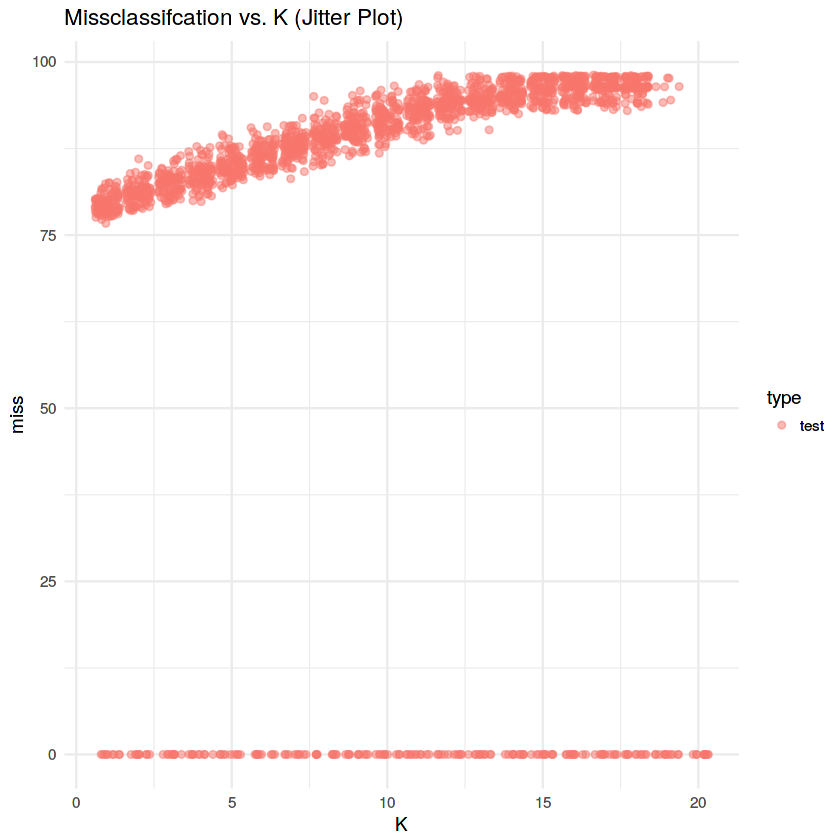

In [268]:
ggplot(data=miss.m, aes(x=K, miss, color=type)) + geom_jitter(alpha=0.5)  + 
    scale_fill_discrete(guide = guide_legend(title = NULL)) + 
    ggtitle('Missclassifcation vs. K (Jitter Plot)') + theme_minimal() 

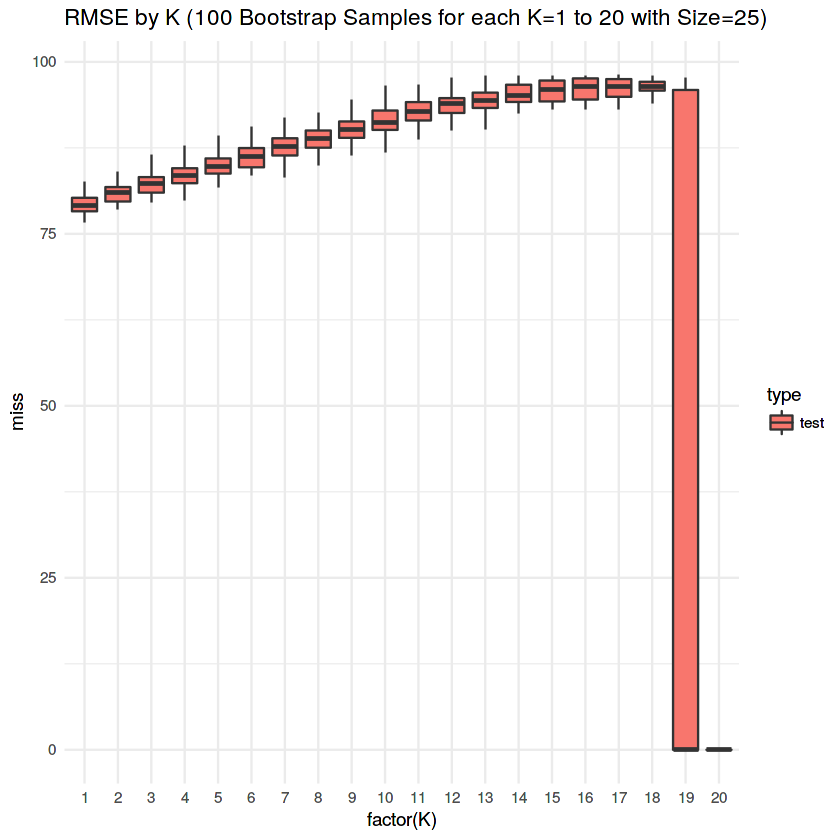

In [269]:
# Apply bootstrapping for KNN regression with 100 bootstrapped datasets, 
# each having 25 samples, and maximum number of neighbours 20


ggplot(data=miss.m[miss.m$type=='test',], aes(factor(K), miss,fill=type)) + 
    geom_boxplot(outlier.shape = NA) + 
    scale_color_discrete(guide = guide_legend(title = NULL)) +
    theme_minimal() +
    ggtitle('RMSE by K (100 Bootstrap Samples for each K=1 to 20 with Size=25)')


### Q3-3 Results interpretation

By the boxplot, we see that complexity and misses keeps increasing as the factor of K increases. I had rounded the values to nearest decimal for knn output and test data for better prediction. Maybe, if I increase the factor of rounding to nearest 10th decimal etc, the prediction would be better. Since it is KNN regression, we are getting the average value, which will almost never be equal to the test value, hence need to utlitize better rounding functions.

### Q3-4 Plot bootstrapping KNN regression for different number of bootstrapped datasets

In [295]:
K <- 5                # k nearest neighbours
N <- 25                # Size of bootstrapped samples
max.sample.size = 200  # Maximum size of sampling
break.size = 10

# generate bootstrap indices:
boot.indx <- boot(nrow(train.data), N, max.sample.size)

# A dataframe to track the RMSE of each case
rmse.df <- data.frame(
                      Times=numeric(),
                      RMSE = double(),
                      stringsAsFactors=FALSE
                      )


In [296]:
# Bootstrap when K = 5
    ### for every dataset size till max.sample.size:
    for (l in 1:max.sample.size){
        
        #### calculate iteration index i
        i <- (K-1)*max.sample.size+l
        
        #### save sample indices that were selected by bootstrap
        indx <- boot.indx[l,]
                
        if (l%%break.size == 0)
        {
            rmse.df <- rbind(rmse.df,data.frame(Times=l,RMSE=rmse(knn(train.data[indx, ], test.data, K), test.data)))
        }
        
    } 


In [297]:
head(rmse.df)

Times,RMSE
10,609.7783
20,498.8207
30,521.1520
40,352.8591
50,398.4826
60,602.8726


In [298]:
# plot misclassification percentage for train and test data sets
rmse.df.m <- melt(rmse.df, id=c('Times')) # reshape for visualization
names(rmse.df.m) <- c('Times', 'type', 'RMSE')

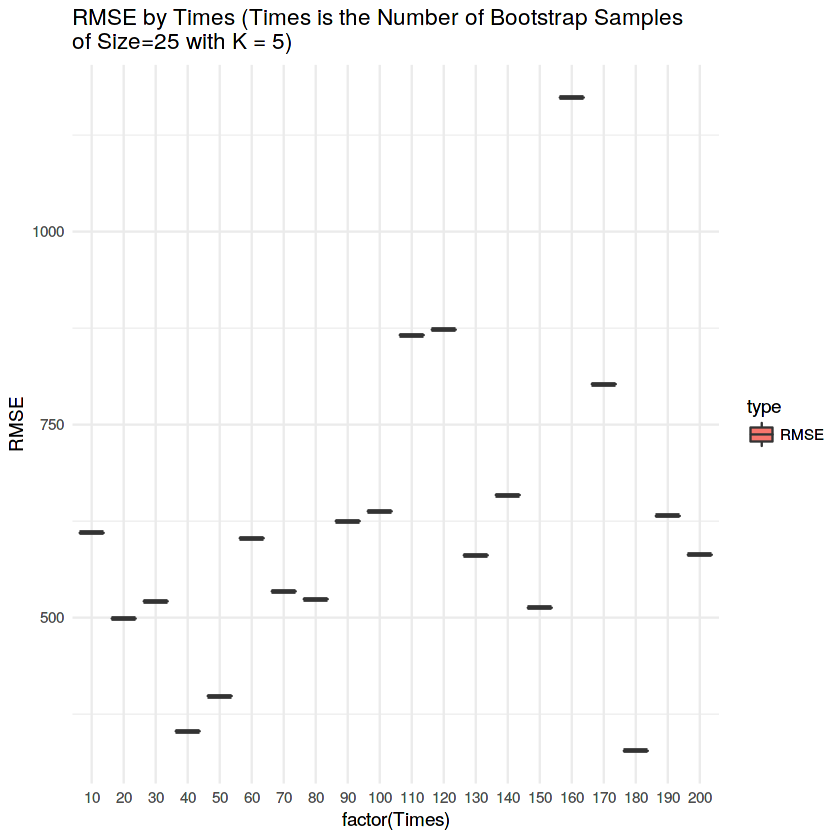

In [299]:
ggplot(data=rmse.df.m, aes(factor(Times), RMSE,fill=type)) + 
    geom_boxplot(outlier.shape = NA) + 
    scale_color_discrete(guide = guide_legend(title = NULL)) +
    theme_minimal() +
    ggtitle('RMSE by Times (Times is the Number of Bootstrap Samples\nof Size=25 with K = 5)')

### Q3-3 Results interpretation

We see that RMSE is at its minimum when the sample size is  30. But the sample sizes around 170, 180 are ideals as well. But when the sample size is 20, we see the worst performing model.

### Part C. Probabilistic Machine Learning
In this part, you show your knowledge about the foundation of the probabilistic machine learning (i.e. probabilistic inference and modeling) by solving one simple but basic statistical inference problems. Solve the following problem based on the probability concepts you have learned in Module 1 with the same math conventions. Please show your work in your report. Also, there are two conceptual questions.

#### Question 4 [Bayes Rule] 
Recall the simple example from Appendix A of Module 1. Suppose we have one red and one blue box. In the red box we have 2 apples and 6 oranges, whilst in the blue box we have 3 apples and 1 orange. Now suppose we randomly selected one of the boxes and picked a fruit. If the picked fruit is an apple, what is the probability that it was picked from the blue box?

Note that the chance of picking the red box is 40% and the selection chance for any of the pieces from a box is equal for all the pieces in that box.

## Question 4 [Bayes Rule] 

In [300]:
#https://math.stackexchange.com/questions/310503/conditional-probability-with-boxes-and-fruits

# Probability of picking the red box
p_red = 0.40

# Probability of picking the blue box
p_blue = 0.60


# Probability of pick a apple from blue box - 3 apples out of 4 fruits
p_apple_blue =  3/4

# Probability of pick a orange from blue box - 1 orange out of 4 fruits
p_orange_blue = 1/4

# Probability of pick a apple from red box - 2 apples out of 8 fruits
p_apple_red = 2/8

# Probability of pick a orange from blue box - 6 oranges out of 8 fruits
p_orange_red = 6/8


# sum and product rules of probability to evaluate the overall probability of choosing an apple
p_apple <- (p_apple_red * p_red) + (p_apple_blue * p_blue)

# Now applying bayes theorem, we can calculate that the probability that the apple was picked from the blue box
p_blue_given_apple <- (p_apple_blue * p_blue) / p_apple
p_blue_given_apple

[1] 0.8181818

In the above solution, probability of picking the apple from the blue box is 9/11 = 0.8181